In [19]:
#Import Libraries
import os.path
from os import path       
import requests
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
from shapely.geometry import Point, Polygon
from geopandas import GeoSeries
import dask

In [ ]:
#Shape file bounds
basin_shape_file_path='./basin_shp.shp'
shape_file=gpd.read_file(basin_shape_file_path) # import basin boundary (Shape file in CRS: EPSG:4326)

#bounding box for data downloading
resolution=0.1   #Resolution of IMERG data
min_lat, max_lat, min_lon, max_lon = shape_file.bounds.miny[0]-resolution/2, shape_file.bounds.maxy[0]+resolution/2, shape_file.bounds.minx[0]-resolution/2, shape_file.bounds.maxx[0]+resolution/2
print(min_lon, min_lat, max_lon, max_lat)

#Download url list for Imerg rainfall data
https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGDF_06/summary?keywords=imerg

workflow:
1. download data url list from above link using the bounding box of the catcment boundary
2. configure earthdata account using "uid" and "password"
3. set current directory where data is to be stored
4. download the data using url list ("url.txt")

In [ ]:
#data download
%%bash
cd ~
touch .netrc
echo "machine urs.earthdata.nasa.gov login <uid> password <password>" >> .netrc  #make sure to enter <uid> and <password>
chmod 0600 .netrc
cd ~
touch .urs_cookies
#change current directory to path where data is to be stored
cd ./RF_data_download/data/    #make sure to create directory
wget --load-cookies ~/.urs_cookies --save-cookies ~/.urs_cookies --auth-no-challenge=on --keep-session-cookies --content-disposition -i <url.txt>     #make sure to enter url list file name with absolute or relative path

In [26]:
#Preparation of the data
RF_data=xr.open_mfdataset('../data/*.nc4')
RF_data['precipitationCal'].to_netcdf('Combined_IMERG_RF_Data.nc')
RF_data=xr.open_dataarray('Combined_IMERG_RF_Data.nc')
RF_data

<xarray.DataArray 'precipitationCal' (time: 435, lon: 21, lat: 8)>
array([[[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00]],

       [[7.847236e-01, 9.138889e+00, ..., 1.934103e-03, 0.000000e+00],
        [7.993833e-01, 5.390382e+00, ..., 2.895697e-01, 1.894295e-01],
        ...,
        [3.954965e-02, 1.258041e-02, ..., 5.428498e-03, 4.952693e-03],
        [2.180123e-02, 1.402715e-02, ..., 5.278827e-03, 1.516127e-02]],

       ...,

       [[1.777210e+01, 1.886733e+01, ..., 1.956052e+01, 3.142911e+01],
        [1.839396e+01, 1.795387e+01, ..., 2.197763e+01, 3.028468e+01],
        ...,
        [1.504085e+00, 5.489082e-01, ..., 1.200888e+00, 1.213233e+00],
        [1.431654e+00, 5.882255e-01, ..., 1.211422e+00, 1.220040e+00]],

       [[9.492426e+00, 9.127956e+00, ..., 3.896490e+00, 5.007993e+00],
        [1.048814e+01, 8.395194e+00, ..., 4.163102e+00, 6.912593e+00],
        ...,
        [1.268140e+01, 5.983580e+00, ..., 5.616656e+00, 5.976683e+00],
        [1.026343e+01, 5.422929e+00, ..., 6.297917e+00, 7.573300e+00]]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 -121.25 -121.149994 ... -119.34999 -119.25
  * lat      (lat) float32 45.95001 46.05 46.150005 ... 46.45001 46.55 46.650005
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2016-03-10
Attributes:
    long_name:  Daily accumulated precipitation (combined microwave-IR) estimate
    units:      mm

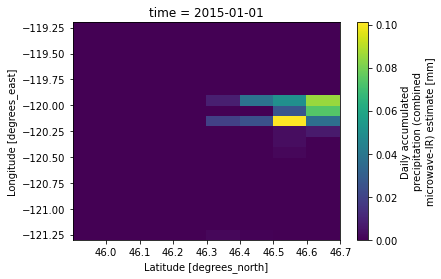

In [27]:
#Plot te data
%matplotlib inline
RF_data[0,:,:].plot()